# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset


In [2]:
df = pd.read_csv("C:\\Users\\abo_O\\OneDrive\\سطح المكتب\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_4\\1-Weekly Task\\Datasets\\Traffic_Jams.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [3]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [4]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [5]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

In [6]:
df['Time'] = pd.to_datetime(df["Time"])
df['Time'].unique()

C:\Users\abo_O\AppData\Local\Temp\ipykernel_11780\3438934672.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df["Time"])


<DatetimeArray>
['2024-08-11 00:00:00', '2024-08-11 00:15:00', '2024-08-11 00:30:00',
 '2024-08-11 00:45:00', '2024-08-11 01:00:00', '2024-08-11 01:15:00',
 '2024-08-11 01:30:00', '2024-08-11 01:45:00', '2024-08-11 02:00:00',
 '2024-08-11 02:15:00', '2024-08-11 02:30:00', '2024-08-11 02:45:00',
 '2024-08-11 03:00:00', '2024-08-11 03:15:00', '2024-08-11 03:30:00',
 '2024-08-11 03:45:00', '2024-08-11 04:00:00', '2024-08-11 04:15:00',
 '2024-08-11 04:30:00', '2024-08-11 04:45:00', '2024-08-11 05:00:00',
 '2024-08-11 05:15:00', '2024-08-11 05:30:00', '2024-08-11 05:45:00',
 '2024-08-11 06:00:00', '2024-08-11 06:15:00', '2024-08-11 06:30:00',
 '2024-08-11 06:45:00', '2024-08-11 07:00:00', '2024-08-11 07:15:00',
 '2024-08-11 07:30:00', '2024-08-11 07:45:00', '2024-08-11 08:00:00',
 '2024-08-11 08:15:00', '2024-08-11 08:30:00', '2024-08-11 08:45:00',
 '2024-08-11 09:00:00', '2024-08-11 09:15:00', '2024-08-11 09:30:00',
 '2024-08-11 09:45:00', '2024-08-11 10:00:00', '2024-08-11 10:15:00',
 '20

In [7]:
df['hour'] = df['Time'].dt.hour
df['hour']

0        0
1        0
2        0
3        0
4        1
        ..
6319    10
6320    20
6321    21
6322    21
6323    23
Name: hour, Length: 6324, dtype: int32

In [8]:
df['minute'] = df['Time'].dt.minute
df['minute']

0        0
1       15
2       30
3       45
4        0
        ..
6319    30
6320     0
6321     0
6322    30
6323    45
Name: minute, Length: 6324, dtype: int32

In [9]:
df['seconds'] = df['Time'].dt.second
df['seconds']

0       0
1       0
2       0
3       0
4       0
       ..
6319    0
6320    0
6321    0
6322    0
6323    0
Name: seconds, Length: 6324, dtype: int32

In [10]:
df['seconds'].unique()

array([0])

In [11]:
df.drop(columns=['seconds', 'Time'], inplace=True)
df.dtypes

Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
hour                  int32
minute                int32
dtype: object

In [12]:
df.dtypes

Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
hour                  int32
minute                int32
dtype: object

In [13]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [14]:
df.groupby('Traffic Situation').agg({'Total' : ['max', 'min', 'sum', 'mean'], 'hour': ['mean', 'max']})

Total                                hour    
                    max  min     sum        mean       mean max
Traffic Situation                                              
heavy               279  168  220614  194.031662  12.282322  21
high                166  112   68947  139.286869  15.022222  21
low                 167   21   57764   69.261391  10.281775  23
normal              223   26  333042   86.325039  11.073613  23

In [15]:
df.groupby('Day of the week').agg({'Total' : ['max', 'min', 'sum', 'mean'], 'hour': ['max', 'mean']})

Total                         hour           
                  max min     sum        mean  max       mean
Day of the week                                              
Friday            279  23   85531  102.801683   23  11.217548
Monday            226  24   87727  107.772727   23  11.442260
Saturday          237  22   88631  108.218559   23  11.523810
Sunday            228  23   89209  109.324755   23  11.715686
Thursday          234  24  109830  107.676471   23  11.545098
Tuesday           239  21  109218  108.029674   23  11.430267
Wednesday         228  24  110221  108.914032   23  11.582016

In [16]:
numaric_cols = df.select_dtypes('int', 'float')
catoigrical_cols = df.select_dtypes('object')
numaric_cols.dtypes, catoigrical_cols.dtypes

(Date          int64
 CarCount      int64
 BikeCount     int64
 BusCount      int64
 TruckCount    int64
 Total         int64
 hour          int32
 minute        int32
 dtype: object,
 Day of the week      object
 Traffic Situation    object
 dtype: object)

In [17]:

cor = numaric_cols.corr()
cor

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041,0.000700,0.001797
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386,0.166163,-0.003722
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261,0.129568,-0.000748
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496,0.191248,-0.017586
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179,-0.008216,0.008932
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000,0.198791,-0.005269
hour,0.000700,0.166163,0.129568,0.191248,-0.008216,0.198791,1.000000,0.000968
minute,0.001797,-0.003722,-0.000748,-0.017586,0.008932,-0.005269,0.000968,1.000000


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [18]:
df.isna().sum()

Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
hour                 0
minute               0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:

le = LabelEncoder()

edf = df.copy()

edf['Traffic Situation'] = le.fit_transform(edf['Traffic Situation'])
edf['Day of the week'] = le.fit_transform(edf['Day of the week'])

edf.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute
0,10,5,13,2,2,24,41,3,0,0
1,10,5,14,1,1,36,52,3,0,15
2,10,5,10,2,2,32,46,3,0,30
3,10,5,10,2,2,36,50,3,0,45
4,10,5,11,2,1,34,48,3,1,0


In [21]:
edf.dtypes

Date                 int64
Day of the week      int32
CarCount             int64
BikeCount            int64
BusCount             int64
TruckCount           int64
Total                int64
Traffic Situation    int32
hour                 int32
minute               int32
dtype: object

In [22]:

scaler = StandardScaler()
df.head()
sdf = edf.copy()

In [23]:
sdf.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute
0,10,5,13,2,2,24,41,3,0,0
1,10,5,14,1,1,36,52,3,0,15
2,10,5,10,2,2,32,46,3,0,30
3,10,5,10,2,2,36,50,3,0,45
4,10,5,11,2,1,34,48,3,1,0


In [24]:
scaler.fit_transform(sdf)

array([[-0.67476474,  0.9060583 , -1.1591755 , ...,  0.7052208 ,
        -1.63845143, -1.34282966],
       [-0.67476474,  0.9060583 , -1.13660396, ...,  0.7052208 ,
        -1.63845143, -0.44817576],
       [-0.67476474,  0.9060583 , -1.22689011, ...,  0.7052208 ,
        -1.63845143,  0.44647813],
       ...,
       [-0.78641926,  0.40836763,  0.962549  , ..., -0.99862498,
         1.35465572, -1.34282966],
       [-0.78641926,  0.40836763,  0.93997746, ..., -0.99862498,
         1.35465572,  0.44647813],
       [-0.78641926,  0.40836763, -1.13660396, ...,  0.7052208 ,
         1.63971354,  1.34113202]])

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'CarCount'}>,
        <Axes: title={'center': 'BikeCount'}>],
       [<Axes: title={'center': 'BusCount'}>,
        <Axes: title={'center': 'TruckCount'}>,
        <Axes: title={'center': 'Total'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minute'}>, <Axes: >]], dtype=object)

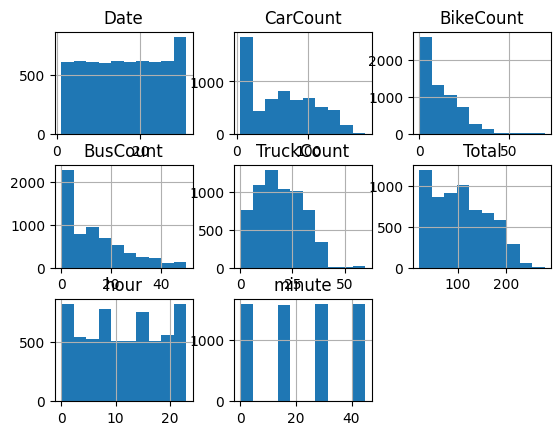

In [25]:
df.hist()

<Axes: >

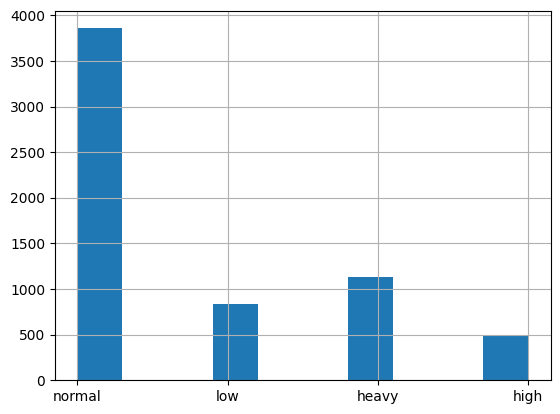

In [26]:
df['Traffic Situation'].hist()

<Axes: >

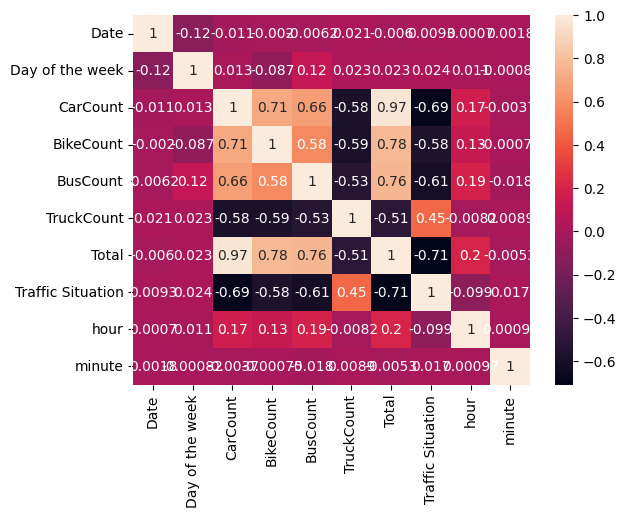

In [27]:
r = sdf.corr()
sns.heatmap(r,annot=True)

<Axes: >

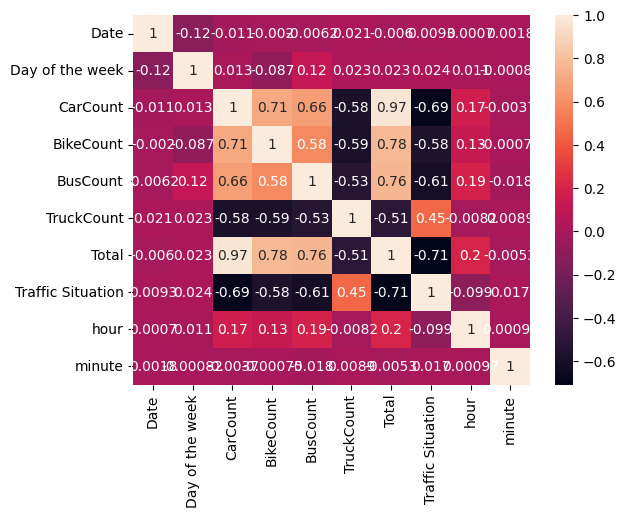

In [28]:
s = edf.corr()
sns.heatmap(s,annot=True)

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [29]:
sdf.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute'],
      dtype='object')

In [30]:
X = sdf.drop(columns=['Traffic Situation'])
y = sdf['Traffic Situation']

X.shape, y.shape

((6324, 9), (6324,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [32]:
base = KNeighborsClassifier()
bag_clf = BaggingClassifier(base, n_estimators=50, random_state=42)

bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50,
                  random_state=42)

### Evaluate the model performance

In [33]:
pred = bag_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Bagging Classifier Model Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, pred))

Bagging Classifier Model Accuracy: 86.51%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       332
           1       0.75      0.51      0.61       162
           2       0.72      0.73      0.72       237
           3       0.88      0.91      0.90      1167

    accuracy                           0.87      1898
   macro avg       0.82      0.78      0.80      1898
weighted avg       0.86      0.87      0.86      1898



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [34]:
base = DecisionTreeClassifier()
boost_clf = AdaBoostClassifier(base, n_estimators=50, random_state=42)

boost_clf.fit(X_train, y_train)

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

### Evaluate the model performance

In [35]:
boost_pred = boost_clf.predict(X_test)

boost_accuracy = accuracy_score(y_test, boost_pred)
print(f'Boosting Classifier Model Accuracy: {boost_accuracy * 100:.2f}%')

print(classification_report(y_test, boost_pred))

Boosting Classifier Model Accuracy: 90.04%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.83      0.76      0.79       162
           2       0.72      0.78      0.75       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.87      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [36]:
base_models = [
    ('decision tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

### Define meta-learner (LogisticRegression)

In [37]:
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [38]:
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stack_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('decision tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [39]:
stack_pred = stack_clf.predict(X_test)

stack_accuracy = accuracy_score(y_test, stack_pred)
print(f'Stacking Classifier Model Accuracy: {stack_accuracy * 100:.2f}%')

print(classification_report(y_test, stack_pred))

Stacking Classifier Model Accuracy: 88.83%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.81      0.65      0.72       162
           2       0.71      0.76      0.73       237
           3       0.90      0.92      0.91      1167

    accuracy                           0.89      1898
   macro avg       0.86      0.83      0.84      1898
weighted avg       0.89      0.89      0.89      1898



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here: